<a href="https://colab.research.google.com/github/e11106013/RDF/blob/main/RDF_%E4%BA%A4%E9%80%9A%E9%83%A8_%E9%81%8B%E8%BC%B8%E5%A0%B4%E7%AB%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  原始檔案下載至 https://link.motc.gov.tw/DownloadFile
  [運輸場站-總表](https://docs.google.com/spreadsheets/d/1qjJ_D8vvfxWA_WPFxYMS9_oOYPv1XGOZ_jtwnROmy88/edit?usp=drive_link)

  "交通部-運輸場站"資料內容如下表:

  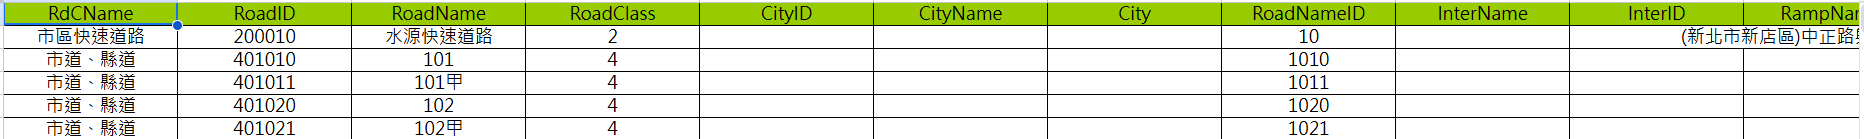

In [ ]:
#@安裝必要的rdflib 套件
!pip install rdflib

In [ ]:
#@title 運輸場站-總表



import pandas as pd

# Excel 檔案網址
url = "https://docs.google.com/spreadsheets/d/1qjJ_D8vvfxWA_WPFxYMS9_oOYPv1XGOZ_jtwnROmy88/export?format=xlsx"

# 使用 pandas 讀取 Excel
df = pd.read_excel(url)

# 顯示欄位名稱
print(df.columns)

Index(['RdCName', 'RoadID', 'RoadName', 'RoadClass', 'CityID', 'CityName',
       'City', 'RoadNameID', 'InterName', 'InterID', 'RampName', 'RampID',
       'MileLength', 'Length', 'Version', 'UpdateDate', 'UpdateNote'],
      dtype='object')


In [ ]:
from rdflib import Graph, Literal, Namespace, URIRef
from rdflib.namespace import RDF, RDFS, XSD
import pandas as pd
import requests
from io import BytesIO


# 建立 RDF graph
g = Graph()

# 定義命名空間
EX = Namespace("http://example.org/road/")
SCHEMA = Namespace("http://schema.org/")

# 在 RDF Turtle 檔案中加入對應的 @prefix 宣告
g.bind("ex", EX)            # '@prefix ex: <http://example.org/road/> .
g.bind("schema", SCHEMA)    # '@prefix schema: <http://schema.org/> .
g.bind("rdfs", RDFS)        # '@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
g.bind("xsd", XSD)          # '@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# 載入資料（前面的那一段程式內容得到 df，這段略過）
# url = "https://docs.google.com/spreadsheets/d/1qjJ_D8vvfxWA_WPFxYMS9_oOYPv1XGOZ_jtwnROmy88/export?format=xlsx"
# df = pd.read_excel(BytesIO(requests.get(url).content))

for _, row in df.iterrows():
    # 以 RoadID 作為主體 URI
    subject = EX[str(row["RoadID"])]

    g.add((subject, RDF.type, SCHEMA.Route))
    g.add((subject, RDFS.label, Literal(row["RoadName"])))
    g.add((subject, EX.roadChineseName, Literal(row["RdCName"])))
    g.add((subject, EX.roadClass, Literal(row["RoadClass"])))
    g.add((subject, EX.cityID, Literal(row["CityID"])))
    g.add((subject, SCHEMA.addressLocality, Literal(row["CityName"])))
    g.add((subject, SCHEMA.addressRegion, Literal(row["City"])))
    g.add((subject, EX.roadNameID, Literal(row["RoadNameID"])))
    g.add((subject, EX.intersectionName, Literal(row["InterName"])))
    g.add((subject, EX.intersectionID, Literal(row["InterID"])))
    g.add((subject, EX.rampName, Literal(row["RampName"])))
    g.add((subject, EX.rampID, Literal(row["RampID"])))

    # 數值欄位加上類型判定
    if pd.notna(row["MileLength"]):
        g.add((subject, EX.mileLength, Literal(row["MileLength"], datatype=XSD.float)))
    if pd.notna(row["Length"]):
        g.add((subject, SCHEMA.length, Literal(row["Length"], datatype=XSD.float)))

    g.add((subject, EX.version, Literal(row["Version"])))

    if pd.notna(row["UpdateDate"]):
        g.add((subject, SCHEMA.dateModified, Literal(str(row["UpdateDate"].date()), datatype=XSD.date)))

    g.add((subject, SCHEMA.description, Literal(row["UpdateNote"])))

# 儲存為 Turtle 檔案
g.serialize(destination="transport_stations.ttl", format="turtle")


<Graph identifier=N08069eba2d084716a311c02875292aea (<class 'rdflib.graph.Graph'>)>

In [ ]:
#print all triples
for s, p, o in g:
   print((s, p, o))

Streaming output truncated to the last 5000 lines.
(rdflib.term.URIRef('http://example.org/road/684005V'), rdflib.term.URIRef('http://schema.org/length'), rdflib.term.Literal('2.0657', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#float')))
(rdflib.term.URIRef('http://example.org/road/657358N'), rdflib.term.URIRef('http://example.org/road/rampName'), rdflib.term.Literal('nan', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.URIRef('http://example.org/road/658363N'), rdflib.term.URIRef('http://example.org/road/roadChineseName'), rdflib.term.Literal('市區一般道路'))
(rdflib.term.URIRef('http://example.org/road/657195N'), rdflib.term.URIRef('http://schema.org/description'), rdflib.term.Literal('nan', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.URIRef('http://example.org/road/100'), rdflib.term.URIRef('http://example.org/road/intersectionID'), rdflib.term.Literal('8.0', datatype=rdflib.term.URIRef('ht

In [ ]:
#@title 擷取一部分展示KG視覺化
g = Graph()
# create graph using turtle
turtledata = """\
@prefix ex: <http://example.org/road/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema1: <http://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:00001A a schema1:Route ;
    rdfs:label "國道1號汐止五股高架道路" ;
    ex:cityID "NaN"^^xsd:double ;
    ex:intersectionID "NaN"^^xsd:double,
        1e+00,
        2e+00,
        3e+00,
        4e+00,
        5e+00 ;
    ex:intersectionName "NaN"^^xsd:double,
        "下塔悠出口匝道",
        "五股轉接道",
        "堤頂交流道",
        "汐止端",
        "環北交流道" ;
    ex:mileLength "18.7"^^xsd:float ;
    ex:rampID "NaN"^^xsd:double ;
    ex:rampName "NaN"^^xsd:double ;
    ex:roadChineseName "國道" ;
    ex:roadClass 0 ;
    ex:roadNameID "0001A" ;
    ex:version "24.11.1" ;
    schema1:addressLocality "NaN"^^xsd:double ;
    schema1:addressRegion "NaN"^^xsd:double ;
    schema1:dateModified "2024-11-22"^^xsd:date ;
    schema1:description "NaN"^^xsd:double ;
    schema1:length "0.2508"^^xsd:float,
        "0.509"^^xsd:float,
        "1.9796"^^xsd:float,
        "3.5265"^^xsd:float,
        "3.7746"^^xsd:float,
        "18.6907"^^xsd:float .
"""
g.parse(data=turtledata, format="turtle")

<Graph identifier=N6d157624ce704c87933e0763db542ac8 (<class 'rdflib.graph.Graph'>)>

In [ ]:
g.serialize(destination="filmgraph.ttl")

<Graph identifier=N6d157624ce704c87933e0763db542ac8 (<class 'rdflib.graph.Graph'>)>

In [ ]:
print(g.serialize(format="xml"))    #print RDF/XML

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:ex="http://example.org/road/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
   xmlns:schema1="http://schema.org/"
>
  <rdf:Description rdf:about="http://example.org/road/00001A">
    <rdf:type rdf:resource="http://schema.org/Route"/>
    <rdfs:label>國道1號汐止五股高架道路</rdfs:label>
    <ex:cityID rdf:datatype="http://www.w3.org/2001/XMLSchema#double">nan</ex:cityID>
    <ex:intersectionID rdf:datatype="http://www.w3.org/2001/XMLSchema#double">nan</ex:intersectionID>
    <ex:intersectionID rdf:datatype="http://www.w3.org/2001/XMLSchema#double">1.0</ex:intersectionID>
    <ex:intersectionID rdf:datatype="http://www.w3.org/2001/XMLSchema#double">2.0</ex:intersectionID>
    <ex:intersectionID rdf:datatype="http://www.w3.org/2001/XMLSchema#double">3.0</ex:intersectionID>
    <ex:intersectionID rdf:datatype="http://www.w3.org/2001/XMLSchema#double">4.0</ex:intersectionID>
    